# Setup
## Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from pathlib import Path
from generative_social_choice.utils.postprocessing import (
    collect_results_and_plot,
    plot_sorted_utility_distributions,
    plot_candidate_distribution_stacked,
    clustered_barplot_with_error_bars,
    plot_scalar_clustered_confidence_intervals,
    save_figure,
    ResultConfig,
)


## Load data

/Users/john/code/generative_social_choice/generative_social_choice/utils/postprocessing.py:305: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  # Generate bootstrap samples
/Users/john/code/generative_social_choice/generative_social_choice/utils/postprocessing.py:305: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  # Generate bootstrap samples
/Users/john/code/generative_social_choice/generative_social_choice/utils/postprocessing.py:1538: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


Mean  Mean of\nBottom 50%   Minimum  2*Mean Log  \
         statistic                                                          
Baseline lower bound  3.775387             3.557929  2.388595    2.645785   
         mean         3.800114             3.607574  2.547630    2.661210   
         upper bound  3.823744             3.654531  2.684734    2.675196   
Ours     lower bound  3.872274             3.754009  3.088563    2.704821   
         mean         3.882583             3.774657  3.135589    2.710443   
         upper bound  3.892945             3.795331  3.184234    2.716102   

                      Mean Log      Gini  
         statistic                        
Baseline lower bound  1.322893  0.033650  
         mean         1.330605  0.038071  
         upper bound  1.337598  0.043129  
Ours     lower bound  1.352410  0.019312  
         mean         1.355222  0.021186  
         upper bound  1.358051  0.023065

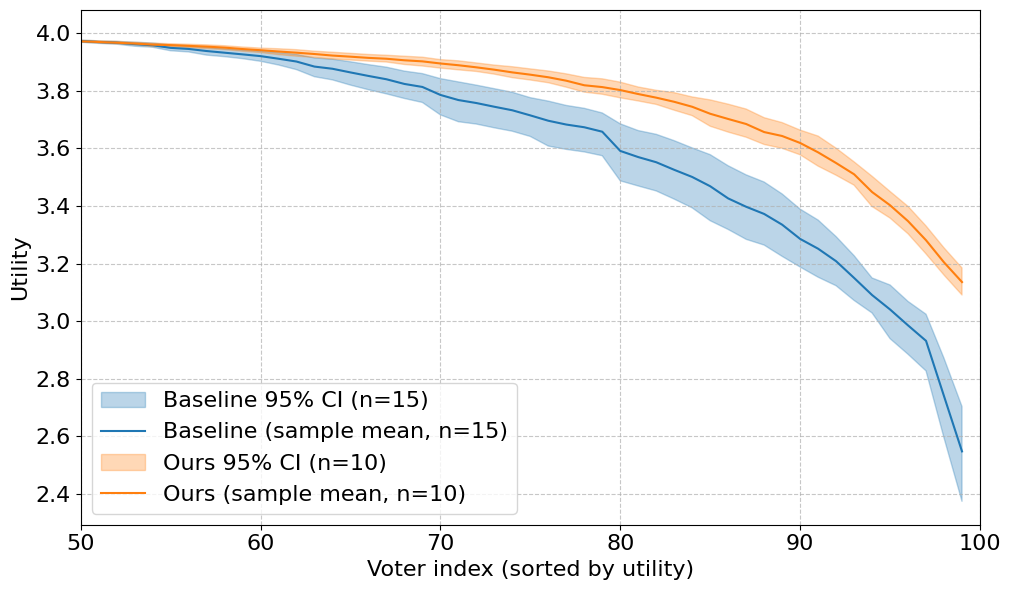

In [ ]:

METHOD = "exact"
CONFIDENCE_LEVEL = .95
N_BOOTSTRAP = 400
# Figure format when saving: "png" or "pdf"
FIG_FORMAT = "pdf"
# Set to a path (e.g. "figures") to save the line plot from collect_results_and_plot; None to not save
SAVE_DIR = "figures/"

result_configs = [
    ResultConfig(
        #name="Ours (LLM Embeddings)",
        name="Ours",
        embedding_type="llm",
        run_ids=list(range(10)),
    ),
    #ResultConfig(
    #    name="Ours (Fish Embeddings)",
    #    embedding_type="fish",
    #    run_ids=[f"fish_{i}" for i in range(10)],
    #),
    #ResultConfig(
    #    name="Baseline (LLM Embeddings)",
    #    embedding_type="seed_statement",
    #    run_ids=range(15),
    #    pipeline="fish",
    #),
    ResultConfig(
        name="Baseline",
        embedding_type="llm",
        run_ids=range(15),
        pipeline="fish",
    )
]

results = collect_results_and_plot(
    result_configs, method=METHOD, confidence_level=CONFIDENCE_LEVEL, n_bootstrap=N_BOOTSTRAP,
    save_dir=SAVE_DIR, fig_format=FIG_FORMAT,
)

results["scalar_confidence_intervals"]

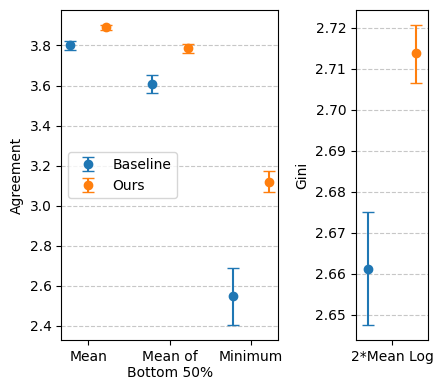

In [8]:
scalar_confidence_intervals_plot = plot_scalar_clustered_confidence_intervals(
    results["scalar_confidence_intervals"].iloc[:,:3],
    y_label="Agreement",
    legend_loc="center left",
    fig_size=(4.5, 4),
    secondary_axis_df=results["scalar_confidence_intervals"].iloc[:,[3]],
    secondary_y_label="Gini",
    font_size=10
)
if SAVE_DIR:
    save_figure(scalar_confidence_intervals_plot, Path(SAVE_DIR) / "scalar_confidence_intervals", FIG_FORMAT)

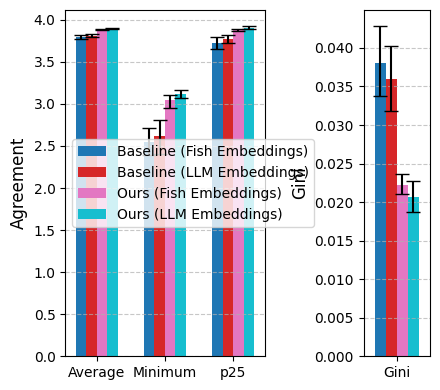

In [6]:
scalar_confidence_intervals_plot = clustered_barplot_with_error_bars(
    results["scalar_confidence_intervals"].iloc[:,:3],
    y_label="Agreement",
    legend_loc="center left",
    fig_size=(4.5, 4),
    secondary_axis_df=results["scalar_confidence_intervals"].iloc[:,[3]],
    secondary_y_label="Gini"
)

### Older Plots

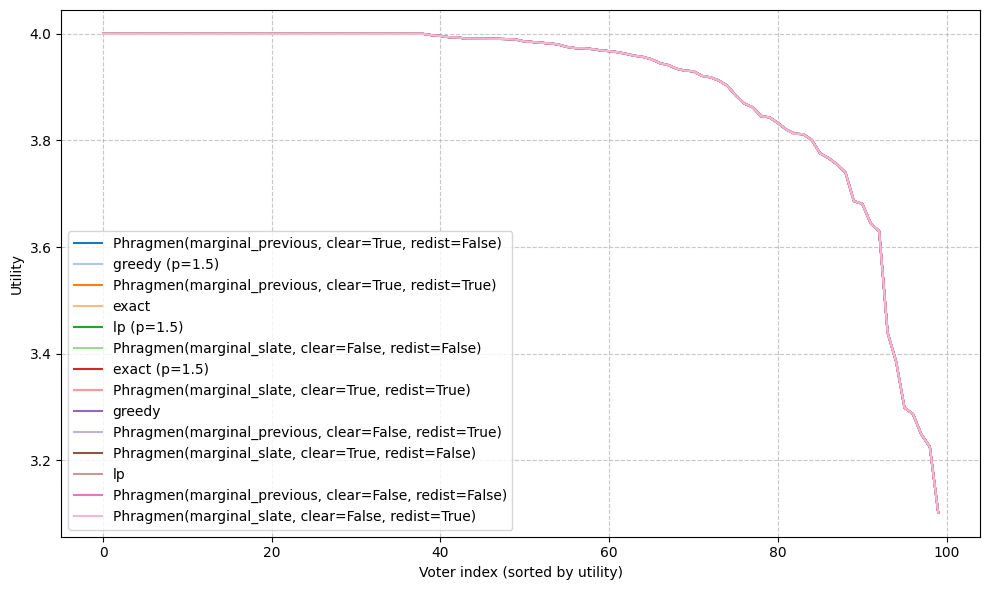

In [7]:
fig = plot_sorted_utility_distributions(results["utility_df_dict"]["Ours (LLM Embeddings)"][0])
if SAVE_DIR:
    save_figure(fig, Path(SAVE_DIR) / "sorted_utility_distributions", FIG_FORMAT)

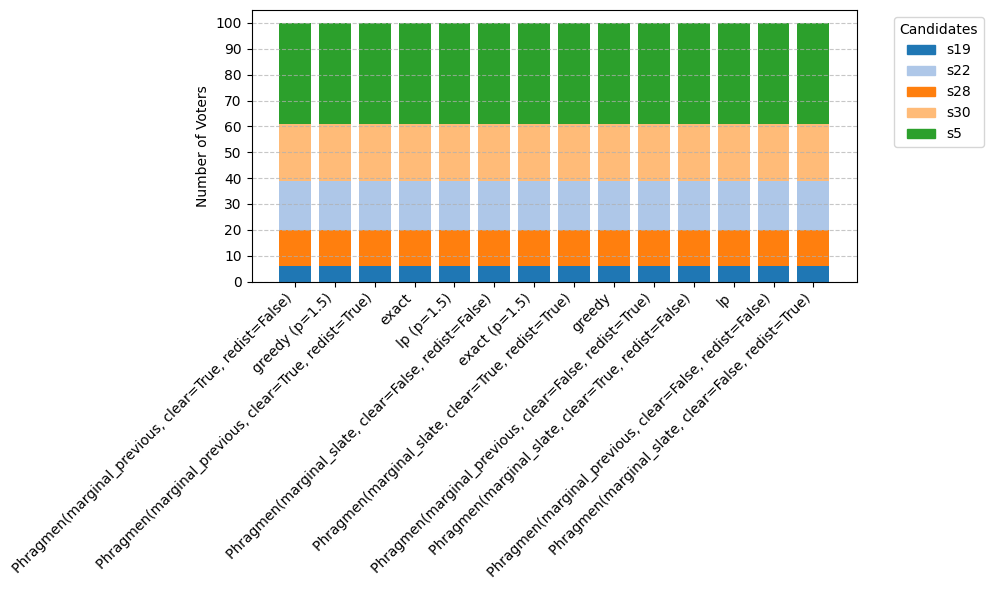

In [8]:
fig = plot_candidate_distribution_stacked(results["algo_assignments"]["Ours (LLM Embeddings)"][0])